In [1]:
import numpy as np
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from matplotlib import collections
import os
from shutil import rmtree
from IPython.display import Video
plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})

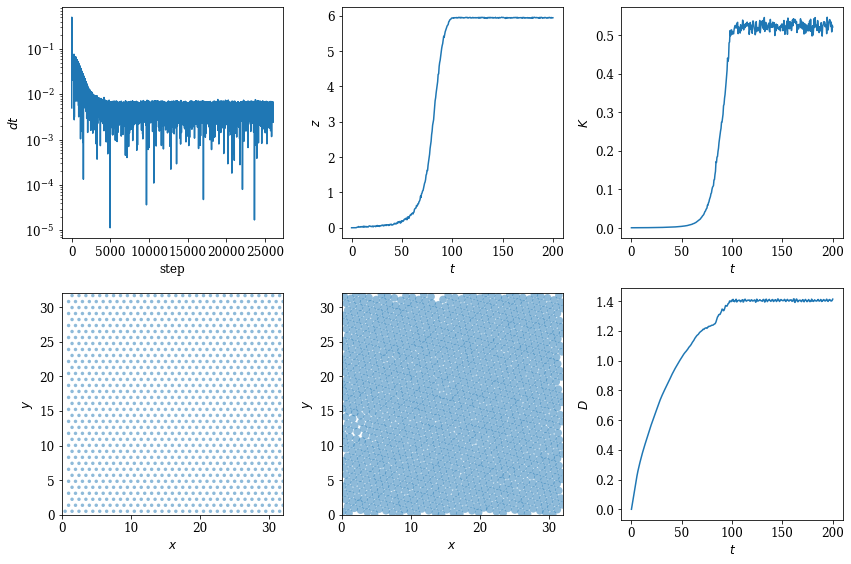

In [24]:
filebase='data/quasistatic'
file=open(filebase+'out.dat')
N,dim,t1,t2,t3,dt,L,R0,R,V,H=file.readline().split()
N=int(N)
dim=int(dim)
L=float(L)
R0=float(R0)
R=float(R)
t1=float(t1)
t2=float(t2)
t3=float(t3)
dt=float(dt)
file.close()
times=np.fromfile(filebase+'times.dat')
order=np.fromfile(filebase+'orders.dat',dtype=np.int32)
states=np.fromfile(filebase+'states.dat')
states=states.reshape((int(len(states)/((2*dim)*N)),(2*dim)*N))
icoord=[]
jcoord=[]
ind=0
while ind<len(order):
    icoord.append(order[ind+1:ind+2*order[ind]+1:2])
    jcoord.append(order[ind+2:ind+2*order[ind]+1:2])
    ind=ind+2*order[ind]+1
coords= np.array([len(ind) for ind in icoord])/(N/2)

plt.subplots(2,3,figsize=(12,8))
plt.subplot(2,3,1)
plt.ylabel('$dt$')
plt.xlabel('step')
plt.yscale('log')
plt.plot(np.diff(times))
plt.subplot(2,3,2)
plt.ylabel('$z$')
plt.xlabel('$t$')
plt.plot(dt*np.arange(len(coords)),coords)
plt.subplot(2,3,4)
t=t3
Rt=R
if t<t2:
    Rt=R0+t/t2*(R-R0)
circles = [plt.Circle((x,y), radius=Rt) for (x,y) in zip(states[0,0::4],states[0,1::4])]
plt.gca().add_collection(collections.PatchCollection(circles,alpha=0.5))
plt.xlim(0,L)
plt.ylim(0,L)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect(1)
plt.subplot(2,3,5)
t=t1
Rt=R
if t<t2:
    Rt=R0+t/t2*(R-R0)
circles = [plt.Circle((x,y), radius=Rt) for (x,y) in zip(states[-1,0::4],states[-1,1::4])]
plt.gca().add_collection(collections.PatchCollection(circles,alpha=0.5))
plt.xlim(0,L)
plt.ylim(0,L)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect(1)

plt.subplot(2,3,3)
plt.xlabel('$t$')
plt.ylabel('$K$')
plt.plot(dt*np.arange(len(states)),np.mean(0.5*(states[:,2::4]**2+states[:,3::4]**2),axis=1))

plt.subplot(2,3,6)
plt.xlabel('$t$')
plt.ylabel('$D$')
plt.plot(dt*np.arange(len(states)), np.mean((np.mod(states[:,0::4]-states[0,0::4]+L/2,L)-L/2)**2+(np.mod(states[:,1::4]-states[0,1::4]+L/2,L)-L/2)**2,axis=1)**0.5)


plt.tight_layout()
plt.show()

In [10]:
skip=1
if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
if not os.path.isdir(filebase+'animation'):
    os.mkdir(filebase+'animation')
    
for i in range(int(len(states)/skip)):
    print(i, int(len(states)/skip),end='\r')
    t=t3+skip*i*(t1-t3)/int(len(states)/skip)
    Rt=R
    if t<t2:
        Rt=R0+t/t2*(R-R0)
    circles = [plt.Circle((x,y), radius=Rt) for (x,y) in zip(states[skip*i,0::4],states[skip*i,1::4])]
    circles2 = [plt.Circle((x,y), radius=R0) for (x,y) in zip(states[skip*i,0::4],states[skip*i,1::4])]
    plt.gca().add_collection(collections.PatchCollection(circles,alpha=0.5))
    plt.gca().add_collection(collections.PatchCollection(circles2,fc='red',alpha=0.5))
    plt.xlim(0,L)
    plt.ylim(0,L)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.gca().set_aspect(1)
    plt.savefig(filebase+'animation/'+str(i).zfill(4)+'.png', dpi=200,bbox_inches='tight')
    plt.close('all')
    
os.system('./encode.sh ' + filebase+'animation/' + ' '  + filebase+'animation 15 ')
rmtree(filebase+'animation')
Video(filebase+'animation.mp4',width=512)

In [9]:
Video(filebase+'animation.mp4',width=512)

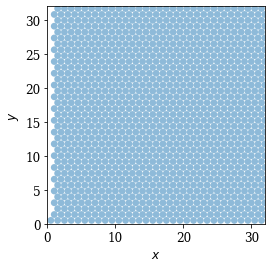

In [350]:
N=1166
R=0.5
V=0.1
xs=[]
ys=[]
x=R
y=R
for i in range(N):
    xs.append(x)
    ys.append(y)
    x=x+2*R
    if(x>L):
        y=y+3**0.5*R
        x=np.mod(x+R,L)

ic=np.concatenate(np.array([xs,ys,V*(np.random.random(N)-0.5),V*(np.random.random(N)-0.5)]).T)
circles = [plt.Circle((x,y), radius=R) for (x,y) in zip(ic[0::4],ic[1::4])]
plt.gca().add_collection(collections.PatchCollection(circles,alpha=0.5))
plt.xlim(0,L)
plt.ylim(0,L)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect(1)
ic.tofile('data/latticeic.dat')

In [ ]:
plt.subplots(1,2,figsize=(8,4))
for i in range(1,21):
    filebase='data/lattice/'+str(i)
    file=open(filebase+'out.dat')
    N,dim,t1,t2,t3,dt,L,R0,R,V,H=file.readline().split()
    N=int(N)
    dim=int(dim)
    L=float(L)
    R0=float(R0)
    R=float(R)
    t1=float(t1)
    t2=float(t2)
    t3=float(t3)
    dt=float(dt)
    file.close()
    times=np.fromfile(filebase+'times.dat')
    order=np.fromfile(filebase+'orders.dat',dtype=np.int32)
    states=np.fromfile(filebase+'states.dat')
    states=states.reshape((int(len(states)/((2*dim)*N)),(2*dim)*N))

    plt.subplot(1,2,1)
    plt.ylabel('$z$')
    plt.xlabel('$t$')
    plt.plot(dt*np.arange(len(order)),order/(N/2))
    plt.subplot(1,2,2)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('$t$')
    plt.ylabel('$D$')
    plt.plot(dt*np.arange(len(states)), np.mean((np.mod(states[:,0::4]-states[0,0::4]+L/2,L)-L/2)**2+(np.mod(states[:,1::4]-states[0,1::4]+L/2,L)-L/2)**2,axis=1)**0.5)
    
plt.tight_layout()
plt.show()

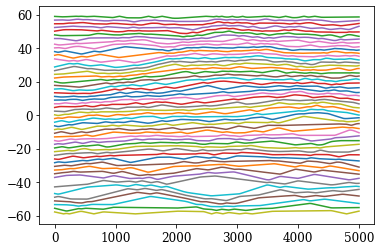

x0' = 1.000 f1(x1)
x1' = -29.361 f0(x0,x12) + -27.809 f0(x0,x40) + -0.405 f0(x1,x16) + -12.740 f0(x1,x34) + -0.384 f0(x2,x37) + 0.146 f0(x2,x51) + -3.094 f0(x2,x58) + 1.487 f0(x2,x76) + 7.066 f0(x3,x34) + 0.712 f0(x4,x18) + -10.310 f0(x5,x16) + 5.950 f0(x5,x34) + 0.414 f0(x6,x8) + 18.551 f0(x7,x16) + 80.133 f0(x7,x34) + 2.225 f0(x8,x86) + 16.384 f0(x9,x16) + 3.847 f0(x10,x18) + -1.014 f0(x10,x94) + 35.162 f0(x11,x16) + -0.100 f0(x11,x25) + 0.605 f0(x12,x26) + 0.209 f0(x14,x36) + 0.061 f0(x14,x66) + 24.094 f0(x15,x16) + -33.419 f0(x16,x17) + -2.467 f0(x16,x23) + -5.230 f0(x16,x25) + -0.301 f0(x16,x31) + 14.810 f0(x16,x33) + -1.416 f0(x16,x35) + 6.561 f0(x16,x37) + 12.481 f0(x16,x41) + 17.260 f0(x16,x43) + 8.151 f0(x16,x45) + -13.049 f0(x16,x47) + 6.589 f0(x16,x49) + 33.582 f0(x16,x53) + 22.876 f0(x16,x55) + 0.331 f0(x16,x59) + -0.427 f0(x16,x60) + 10.150 f0(x16,x61) + 22.836 f0(x16,x63) + 0.075 f0(x16,x65) + -0.579 f0(x16,x67) + 12.168 f0(x16,x69) + -1.153 f0(x16,x70) + -25.564 f0(x16,x

In [226]:
import pysindy as ps

test=np.fromfile("data/test.dat")
test2=test.reshape((50,5001,2))
R=1
dt=0.01
X=np.transpose([test2[:,:,0],test2[:,:,1]],axes=(1,0,2)).reshape(len(test2)*2,test2.shape[1]).T
plt.plot(X[:,::2])
plt.show()
def iden (x):
    return x
def pairwise (x,y):
    d=y-x
    return [ np.sign(d[i])*(1-np.linalg.norm(d[i])/(2*R))**1.5 if np.linalg.norm(d[i])<2*R else 0 for i in range(len(d)) ]

library_functions = [pairwise,iden]
custom_library = ps.CustomLibrary(library_functions=library_functions)
model = ps.SINDy(feature_library=custom_library)
model.fit(X, t=np.arange(0,len(X))*dt)
model.print()

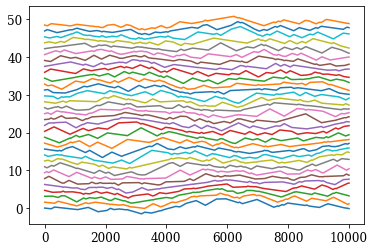

x0' = 0.999 f1(x1)
x1' = 95.778 f0(x0,x2) + 95.844 f0(x0,x62) + -0.014 f0(x33,x60) + 0.016 f0(x37,x60)
x2' = 0.999 f1(x3)
x3' = -95.869 f0(x0,x2) + 95.954 f0(x2,x4) + -0.015 f0(x51,x60) + -0.015 f0(x60,x61)
x4' = 0.999 f1(x5)
x5' = -95.978 f0(x2,x4) + 95.931 f0(x4,x6)
x6' = 0.999 f1(x7)
x7' = -95.880 f0(x4,x6) + 95.898 f0(x6,x8)
x8' = 0.999 f1(x9)
x9' = -95.935 f0(x6,x8) + 95.989 f0(x8,x10)
x10' = 0.999 f1(x11)
x11' = -96.012 f0(x8,x10) + 95.895 f0(x10,x12)
x12' = 0.999 f1(x13)
x13' = -95.796 f0(x10,x12) + 95.654 f0(x12,x14)
x14' = 0.999 f1(x15)
x15' = -95.755 f0(x12,x14) + 95.833 f0(x14,x16)
x16' = 0.999 f1(x17)
x17' = -95.833 f0(x14,x16) + 95.938 f0(x16,x18)
x18' = 0.999 f1(x19)
x19' = -95.938 f0(x16,x18) + 95.803 f0(x18,x20)
x20' = 0.999 f1(x21)
x21' = -95.774 f0(x18,x20) + 95.938 f0(x20,x22)
x22' = 0.999 f1(x23)
x23' = -95.668 f0(x20,x22) + 95.567 f0(x22,x24)
x24' = 0.999 f1(x25)
x25' = -95.864 f0(x22,x24) + 95.731 f0(x24,x26)
x26' = 0.999 f1(x27)
x27' = -95.729 f0(x24,x26) + 95.81

In [240]:
filebase='data/1d'
file=open(filebase+'out.dat')
N,dim,t1,t2,t3,dt,L,R0,R,V,H=file.readline().split()
N=int(N)
dim=int(dim)
L=float(L)
R0=float(R0)
R=float(R)
t1=float(t1)
t2=float(t2)
t3=float(t3)
dt=float(dt)
file.close()
times=np.fromfile(filebase+'times.dat')
order=np.fromfile(filebase+'orders.dat',dtype=np.int32)
states=np.fromfile(filebase+'states.dat')
states=states.reshape((int(len(states)/((2*dim)*N)),(2*dim)*N))
states[:,0]=np.mod(states[:,0]+L/2,L)-L/2
states[:,2]=np.mod(states[:,2]+L/2,L)-L/2
states[:,-2]=np.mod(states[:,-2]-L/2,L)+L/2
icoord=[]
jcoord=[]
ind=0
while ind<len(order):
    icoord.append(order[ind+1:ind+2*order[ind]+1:2])
    jcoord.append(order[ind+2:ind+2*order[ind]+1:2])
    ind=ind+2*order[ind]+1
coords= np.array([len(ind) for ind in icoord])/(N/2)
plt.plot(states[:,::2])
plt.show()

def iden (x):
    return x
def pairwise (x,y):
    d=np.mod(x-y+L/2,L)-L/2
    return [ np.sign(d[i])*(1-np.linalg.norm(d[i])/(2*R))**1.5 if np.linalg.norm(d[i])<2*R else 0 for i in range(len(d)) ]

states.shape
import pysindy as ps
library_functions = [pairwise,iden]
custom_library = ps.CustomLibrary(library_functions=library_functions)
model = ps.SINDy(feature_library=custom_library)
model.fit(states, t=np.arange(0,len(states))*dt)
model.print()

In [237]:
skip=10
if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
if not os.path.isdir(filebase+'animation'):
    os.mkdir(filebase+'animation')
    
for i in range(int(len(states)/skip)):
    print(i, int(len(states)/skip),end='\r')
    circles=[plt.Circle((x,0),radius=R) for x in states[i*skip, ::2]]
    plt.gca().add_collection(collections.PatchCollection(circles,alpha=0.5))
    plt.xlim(0,L)
    plt.ylim(-L/2,L/2)
    plt.gca().set_aspect(1)
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.savefig(filebase+'animation/'+str(i).zfill(4)+'.png', dpi=200,bbox_inches='tight')
    plt.close('all')
    
os.system('./encode.sh ' + filebase+'animation/' + ' '  + filebase+'animation 15 ')
rmtree(filebase+'animation')
Video(filebase+'animation.mp4',width=512)

ffmpeg version 4.2.4-1ubuntu0.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-10ubuntu2)
  configuration: --prefix=/usr --extra-version=1ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-l